In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [11]:
def bar_chart(feature):
    # Create a DataFrame with counts for each combination of Survived and feature
    df = train.groupby(['Survived', feature]).size().reset_index(name='Count')
    
    # Create the bar plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature, y='Count', hue='Survived', data=df, ci=None)
    
    # Set chart title and labels
    plt.title(f'Survival Counts by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()

In [12]:
def print_counts(feature):
    survived_counts = train[train['Survived'] == 1][feature].value_counts()
    dead_counts = train[train['Survived'] == 0][feature].value_counts()
    print("Survived:\n", survived_counts, "\n")
    print("Dead:\n", dead_counts, "\n")

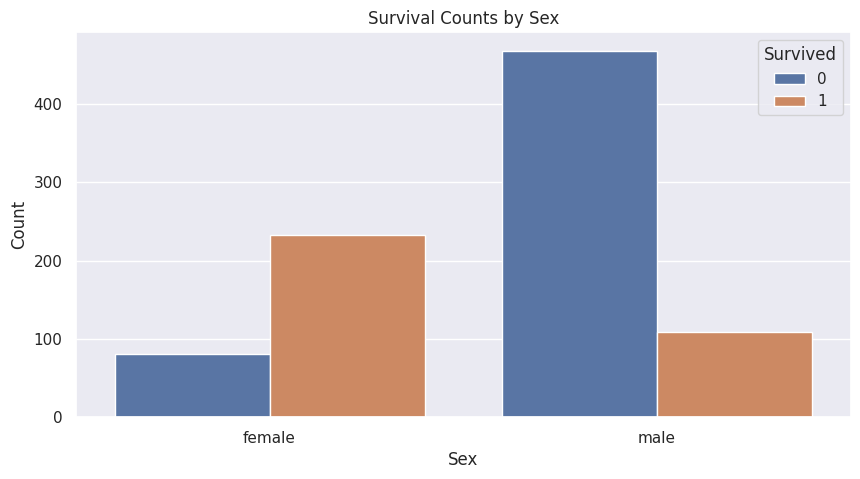

Survived:
 Sex
female    233
male      109
Name: count, dtype: int64 

Dead:
 Sex
male      468
female     81
Name: count, dtype: int64 



In [13]:
# Generate the bar chart
bar_chart('Sex')

# Print the counts
print_counts('Sex')

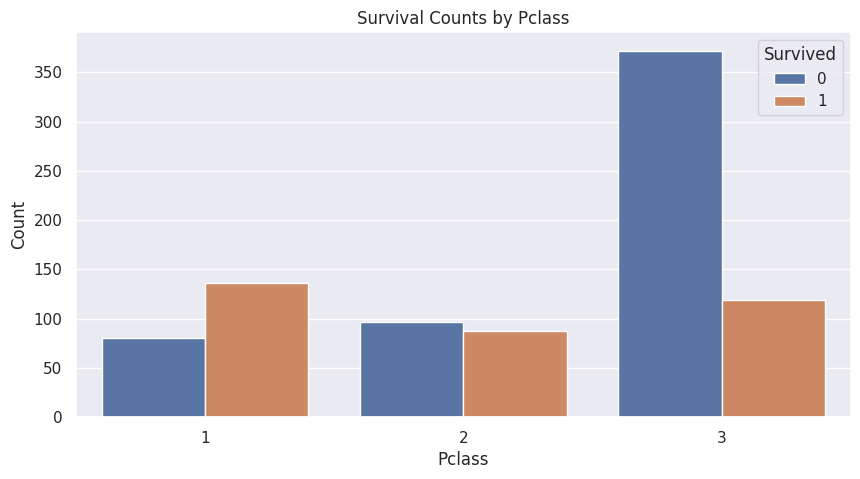

Survived:
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64 

Dead:
 Pclass
3    372
2     97
1     80
Name: count, dtype: int64 



In [14]:
# Generate the bar chart
bar_chart('Pclass')

# Print the counts
print_counts('Pclass')

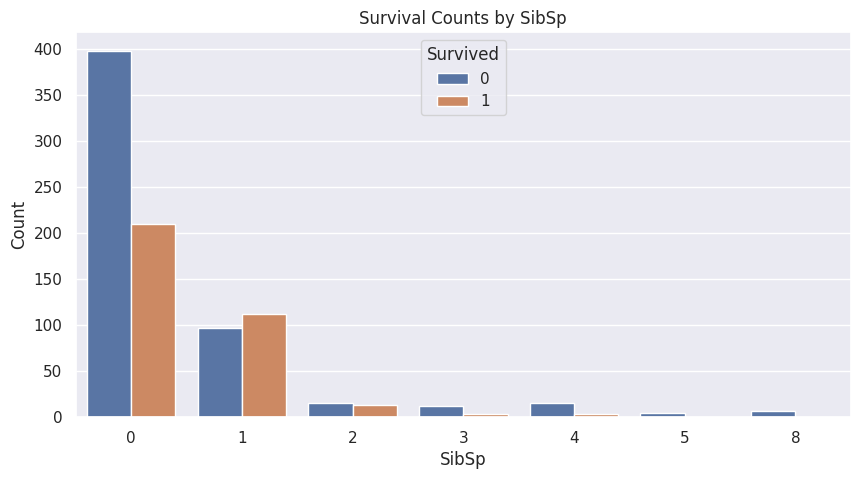

Survived:
 SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64 

Dead:
 SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64 



In [15]:
# Generate the bar chart
bar_chart('SibSp')

# Print the counts
print_counts('SibSp')

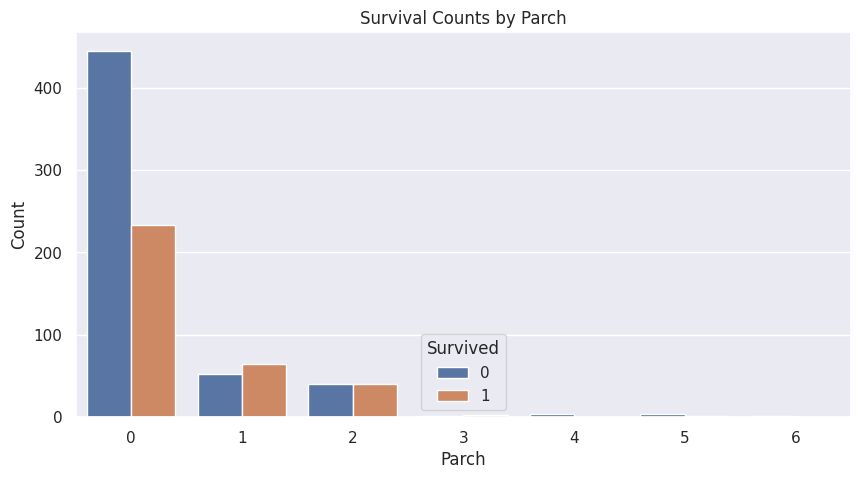

Survived:
 Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64 

Dead:
 Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64 



In [16]:
# Generate the bar chart
bar_chart('Parch')

# Print the counts
print_counts('Parch')

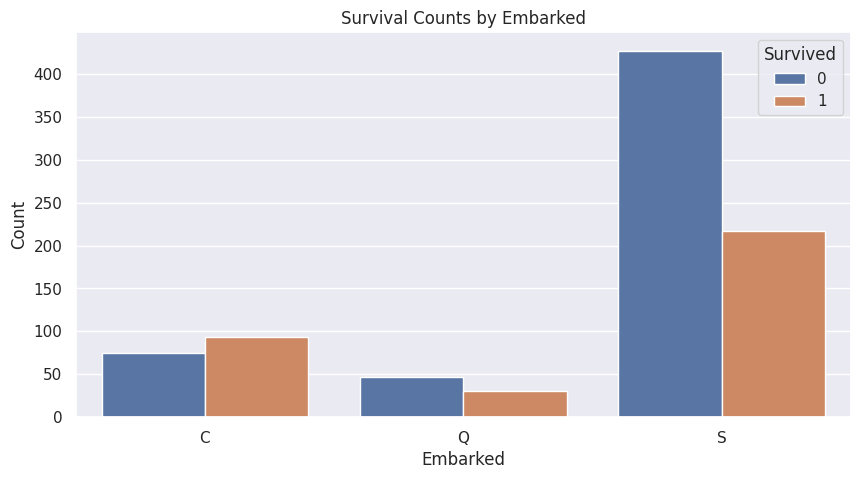

Survived:
 Embarked
S    217
C     93
Q     30
Name: count, dtype: int64 

Dead:
 Embarked
S    427
C     75
Q     47
Name: count, dtype: int64 



In [17]:
# Generate the bar chart
bar_chart('Embarked')

# Print the counts
print_counts('Embarked')

# Feature Engineering

In [18]:
# Convert 'Embarked' column to numerical values
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

# Impute missing 'Embarked' values with mode
embarked_mode = train["Embarked"].mode()[0]
train["Embarked"] = train["Embarked"].fillna(embarked_mode)

In [19]:
# Convert 'Sex' column to numerical values
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

# Impute missing 'Sex' values with mode (although there are no missing values in 'Sex')
sex_mode = train["Sex"].mode()[0]
train["Sex"] = train["Sex"].fillna(sex_mode)

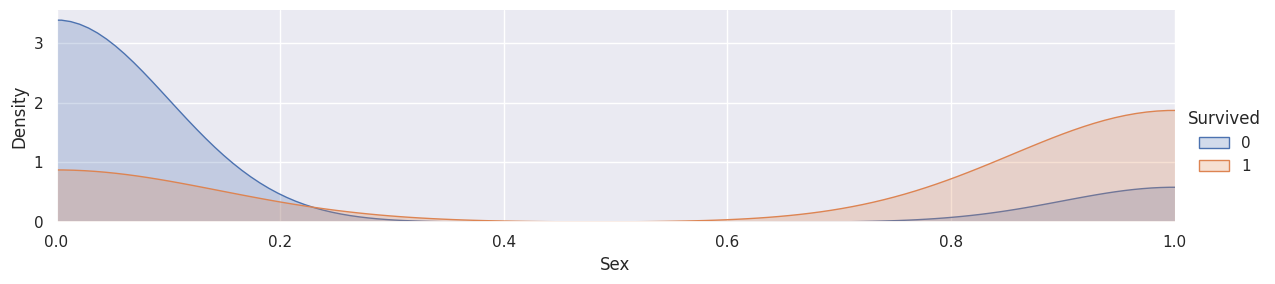

In [20]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Sex',shade= True)
facet.set(xlim=(0, train['Sex'].max()))
facet.add_legend() 
plt.show()

In [21]:
# Impute missing 'Age' values with median
age_median = train["Age"].median()
train["Age"] = train["Age"].fillna(age_median)

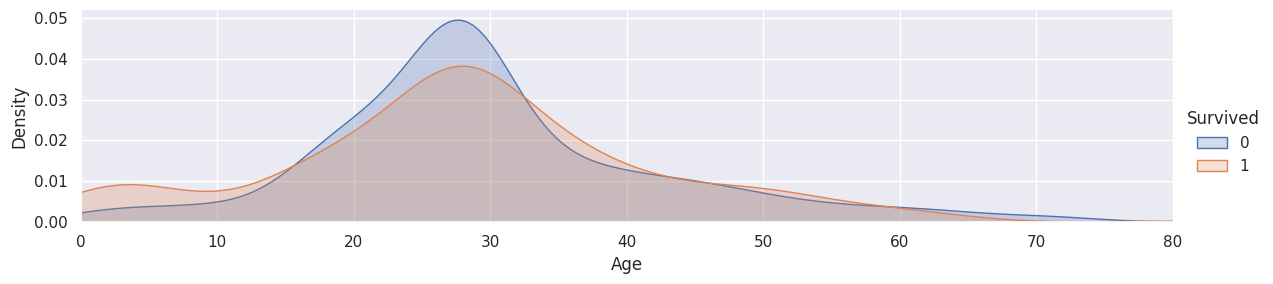

In [22]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

In [23]:
# Impute missing 'Pclass' values with mode (although there are no missing values in 'Pclass')
pclass_mode = train["Pclass"].mode()[0]
train["Pclass"] = train["Pclass"].fillna(pclass_mode)

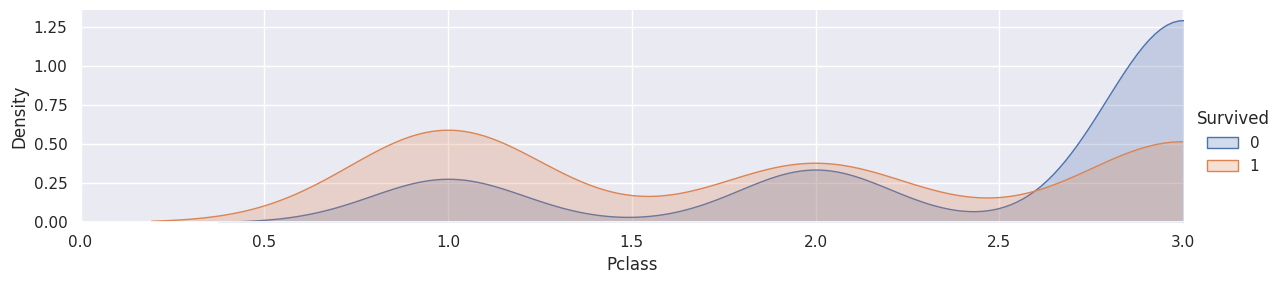

In [24]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Pclass',shade= True)
facet.set(xlim=(0, train['Pclass'].max()))
facet.add_legend() 
plt.show()

In [25]:
# Impute missing 'Fare' values with median
fare_median = train["Fare"].median()
train["Fare"] = train["Fare"].fillna(fare_median)

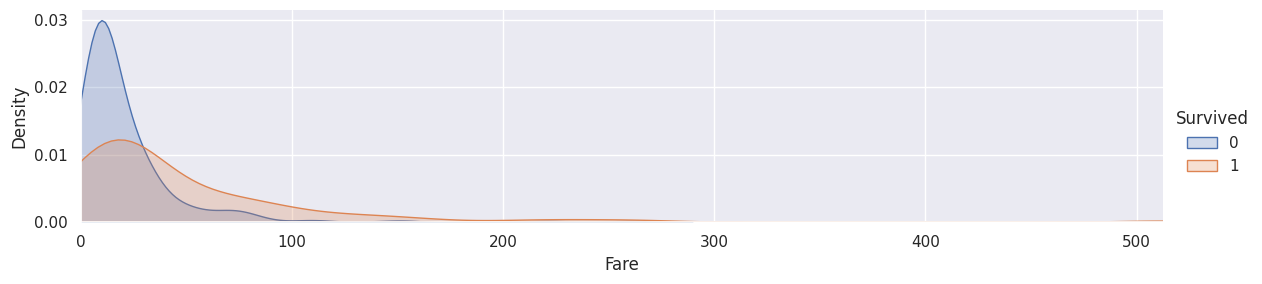

In [26]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend() 
plt.show()

In [27]:
# Impute missing 'SibSp' values with mode (although there are no missing values in 'SibSp')
sibsp_mode = train["SibSp"].mode()[0]
train["SibSp"] = train["SibSp"].fillna(sibsp_mode)

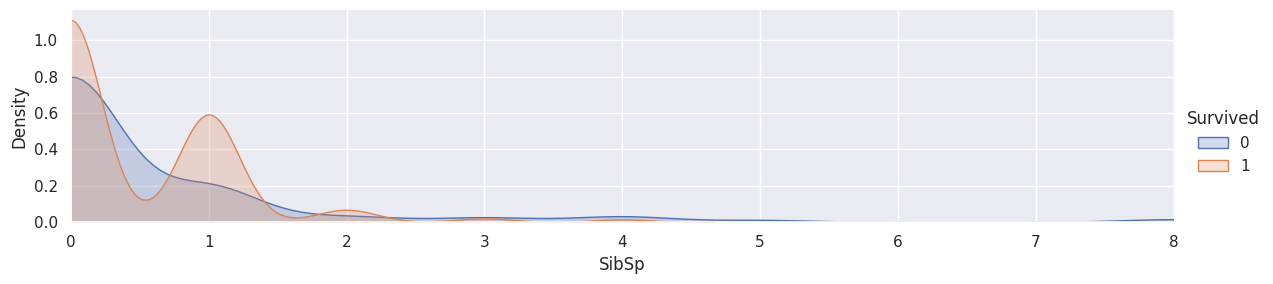

In [28]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'SibSp',shade= True)
facet.set(xlim=(0, train['SibSp'].max()))
facet.add_legend() 
plt.show()

In [29]:
# Impute missing 'Parch' values with mode (although there are no missing values in 'Parch')
parch_mode = train["Parch"].mode()[0]
train["Parch"] = train["Parch"].fillna(parch_mode)

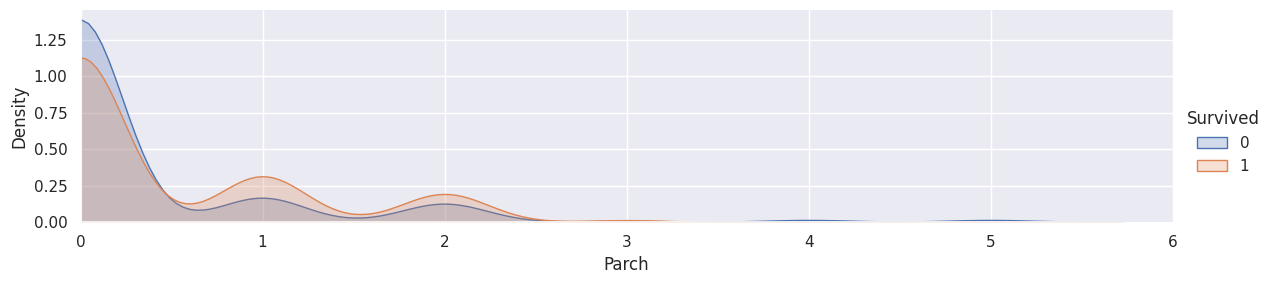

In [30]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Parch',shade= True)
facet.set(xlim=(0, train['Parch'].max()))
facet.add_legend() 
plt.show()

In [31]:
# Create 'Relatives' column
train["Relatives"] = train["SibSp"] + train["Parch"]

# Impute missing 'Relatives' values with mode
relatives_mode = train["Relatives"].mode()[0]
train["Relatives"] = train["Relatives"].fillna(relatives_mode)

In [32]:
# Convert 'Age' into discrete variables
train.loc[train["Age"] < 16, "Age"] = 0
train.loc[(train["Age"] >= 16) & (train["Age"] < 60), "Age"] = 1
train.loc[train["Age"] >= 60, "Age"] = 2

In [33]:
# Transform 'Fare' column using log transformation
train["Fare"] = np.log10(train["Fare"] + 1).astype(int)

In [34]:
# Dropping columns with lots of missing values and those with lack of correlation with survival
feature_table = train[["Pclass","Sex","Age","Fare","SibSp","Parch"]]

In [35]:
# Checking the final DataFrame structure
print(feature_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   Fare    891 non-null    int64  
 4   SibSp   891 non-null    int64  
 5   Parch   891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB
None


In [36]:
feature_table.head()

,Pclass,Sex,Age,Fare,SibSp,Parch
0,3,0,1.0,0,1,0
1,1,1,1.0,1,1,0
2,3,1,1.0,0,0,0
3,1,1,1.0,1,1,0
4,3,0,1.0,0,0,0


# Machine Learning Models

In [37]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler().fit(feature_table)
feature_table = scaler.transform(feature_table)

# Extracting the target values
target_values = train["Survived"].values

## SVM Classifier

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold

svm = SVC(C=0.5, kernel='rbf', tol=0.00001, degree=2)
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
cv_results = cross_val_score(svm, feature_table, target_values, cv=kfold, scoring='accuracy')
print("svm: %f (%f)" % (cv_results.mean(), cv_results.std()))
svm.fit(feature_table, target_values)
print('SVM Training Score: ' + str(svm.score(feature_table, target_values)*100))

svm: 0.820400 (0.019669)
SVM Training Score: 82.82828282828282


## Desition Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=4, max_depth=5)
cv_results = cross_val_score(dt, feature_table, target_values, cv=kfold, scoring='accuracy')
print("dt: %f (%f)" % (cv_results.mean(), cv_results.std()))
dt.fit(feature_table, target_values)
print('Decision Tree Training Score: ' + str(dt.score(feature_table, target_values)*100))

dt: 0.817054 (0.021388)
Decision Tree Training Score: 82.82828282828282


## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=4, max_depth=5)
cv_results = cross_val_score(rf, feature_table, target_values, cv=kfold, scoring='accuracy')
print("rf: %f (%f)" % (cv_results.mean(), cv_results.std()))
rf.fit(feature_table, target_values)
print('Random Forest Training Score: ' + str(rf.score(feature_table, target_values)*100))

rf: 0.815930 (0.019645)
Random Forest Training Score: 83.61391694725027


## K-Nearest Neigbhours

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
cv_results = cross_val_score(knn, feature_table, target_values, cv=kfold, scoring='accuracy')
print("knn: %f (%f)" % (cv_results.mean(), cv_results.std()))
knn.fit(feature_table, target_values)
print('K Nearest Neighbors Training Score: ' + str(knn.score(feature_table, target_values)*100))

knn: 0.813670 (0.023288)
K Nearest Neighbors Training Score: 83.05274971941638


In [42]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('svm', svm), 
    ('dt', dt),
    ('rf', rf),
    ('knn', knn)], voting='hard')
cv_results = cross_val_score(voting_classifier, feature_table, target_values, cv=kfold, scoring='accuracy')
print("voting result: %f (%f)" % (cv_results.mean(), cv_results.std()))
voting_classifier.fit(feature_table, target_values)

voting result: 0.817054 (0.020790)


VotingClassifier(estimators=[('svm', SVC(C=0.5, degree=2, tol=1e-05)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_split=4)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_split=4)),
                             ('knn', KNeighborsClassifier())])

# Data Preparation and Prediction on Test Data

In [43]:
# Data processing and value imputing for test data
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1
test["Sex"] = test["Sex"].fillna(test["Sex"].mode()[0])
test["Age"] = test["Age"].fillna(test["Age"].median())
test.loc[test["Age"] < 16, "Age"] = 0
test.loc[(test["Age"] >= 16) & (test["Age"] < 60), "Age"] = 1
test.loc[test["Age"] >= 60, "Age"] = 2
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test["Fare"] = np.log10(test["Fare"] + 1).astype(int)
test["Parch"] = test["Parch"].fillna(test["Parch"].mode()[0])
test["SibSp"] = test["SibSp"].fillna(test["SibSp"].mode()[0])
test["Relatives"] = test["SibSp"] + test["Parch"]
test["Relatives"] = test["Relatives"].fillna(test["Relatives"].mode()[0])


In [44]:
# Test features preparation
test_features = test[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch"]]
test_features = scaler.transform(test_features)

In [45]:
# Making predictions using the ensemble model
test_predictions = voting_classifier.predict(test_features)

In [46]:
# Saving predictions to CSV
passenger_id = test["PassengerId"].values
my_solution = pd.DataFrame(test_predictions, passenger_id, columns=["Survived"])
my_solution.to_csv("Submissions.csv", index_label=["PassengerId"])